In [3]:
import pandas as pd
df = pd.read_csv("titanicdataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
df[df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [13]:
import numpy as np

df["Cabin_null"] = np.where(df["Cabin"].isnull(), 1, 0)
df["Cabin_null"].mean()

0.7822966507177034

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [17]:
df[["Survived", "Cabin_null"]]

,Survived,Cabin_null
0,0,1
1,1,1
2,0,1
3,0,1
4,1,1
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [19]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.823308
1    0.710526
Name: Cabin_null, dtype: float64

In [20]:
dfselected = df[["Age", "Fare", "Survived"]]

In [21]:
dfselected.head()

,Age,Fare,Survived
0,34.5,7.8292,0
1,47.0,7.0000,1
2,62.0,9.6875,0
3,27.0,8.6625,0
4,22.0,12.2875,1


In [22]:
dfselected.isnull().mean()

Age         0.205742
Fare        0.002392
Survived    0.000000
dtype: float64

In [23]:
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median) 

In [24]:
dfselected["Age"].median()

27.0

In [27]:
impute_nan(dfselected, "Age", dfselected["Age"].median()) #other syntax of dfselected["Age"] is dfselected.Age

C:\Users\cheta\AppData\Local\Temp/ipykernel_11884/615494597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+"_median"] = df[variable].fillna(median)


In [26]:
dfselected.isnull().mean()

Age           0.205742
Fare          0.002392
Survived      0.000000
Age_median    0.000000
dtype: float64

In [28]:
dfselected.head()

,Age,Fare,Survived,Age_median
0,34.5,7.8292,0,34.5
1,47.0,7.0000,1,47.0
2,62.0,9.6875,0,62.0
3,27.0,8.6625,0,27.0
4,22.0,12.2875,1,22.0


In [30]:
print(dfselected.Age.std())
print(dfselected.Age_median.std()) 
#this shows that the the filling nan value by median is not making much disturnbance in data as std differencce is very low
#this method of replacing with median can be okay or else you can try with any other method also 
#always compare the std after that and find which method suits for filling that dataset

14.18120923562442
12.703769846333287


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

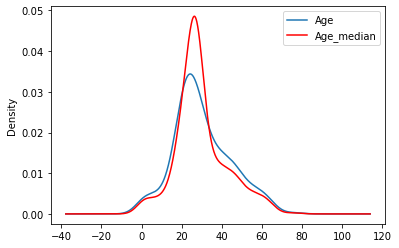

In [35]:
fig=plt.figure()
ax = fig.add_subplot(111)
dfselected["Age"].plot(kind="kde", ax=ax)
dfselected["Age_median"].plot(kind="kde", ax=ax, color="red")
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")